In [2]:
#exercice A 

import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# Load data
file = open('./dataA.txt')
data = pd.read_csv(file, sep = '\t')

#Question 2
data['heightFathers'] = data['heightFathers'] * 2.54
data['heightMothers'] = data['heightMothers'] * 2.54

#df=pd.DataFrame(data)
#df

#Question 3

# Plot the histogram for father heights
plt.figure(figsize=(10, 6))
plt.hist(data['heightFathers'], bins=20, color='blue',edgecolor="black", alpha=0.7, label='Father Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Father Heights Histogram')
plt.legend()

# Plot the histogram for mother heights
plt.figure(figsize=(10, 6))
plt.hist(data['heightMothers'], bins=20, color='red',edgecolor="black", alpha=0.7, label='Mother Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Mother Heights Histogram')
plt.legend()

# Show the plots
plt.show()

##Question 4 : cumulative function

import matplotlib.pyplot as plt
import numpy as np

# Sort the data
father_heights = np.sort(data['heightMothers'])
mother_heights = np.sort(data['heightFathers'])

new_data = data[['heightMothers', 'heightFathers']]
print(new_data)

import matplotlib.pyplot as plt
import seaborn as sns


# Plot the empirical CDF of mothers heights
plt.figure(figsize=(10, 6))
sns.ecdfplot(mother_heights, color='red', label='ECDF (Mother Heights)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of mothers heights')
plt.legend()

# Plot the empirical CDF of fathers heights
plt.figure(figsize=(10, 6))
sns.ecdfplot(father_heights, color='blue', label='ECDF (father_heights)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of fathers heights')
plt.legend()


# Show the plot
plt.show()

#Question 5

import scipy.stats as stats

# Create the probability plot
plt.figure(figsize=(8, 6))
res = stats.probplot(mother_heights, plot=plt, dist='norm')
plt.title('Probability Plot against Theoretical Gaussian Distribution for mothers heights')

# Create the probability plot
plt.figure(figsize=(8, 6))
res = stats.probplot(father_heights, plot=plt, dist='norm')
plt.title('Probability Plot against Theoretical Gaussian Distribution for fathers heights')


# Show the plot
plt.show()

#the data points closely follow the straight line, it suggests that the data is normally distributed

#Question 6 

# Perform the Shapiro-Wilk test for mothers' heights
stat_mother, p_value_mother_Shapiro_Wilk_test = stats.shapiro(mother_heights)
print(f'Shapiro-Wilk Test for Mothers\' Heights:\n'
      f'Statistic_Shapiro_Wilk_test: {stat_mother}\n'
      f'p-value_Shapiro_Wilk_test: {p_value_mother_Shapiro_Wilk_test}\n')

# Perform the Shapiro-Wilk test for fathers' heights
stat_father, p_value_father_Shapiro_Wilk_test = stats.shapiro(father_heights)
print(f'Shapiro-Wilk Test for Fathers\' Heights:\n'
      f'Statistic_Shapiro_Wilk_test: {stat_father}\n'
      f'p-value_Shapiro_Wilk_test: {p_value_father_Shapiro_Wilk_test}\n')

#pour les hommes, 0.1>0.05 donc notre hypothèse n'est pas rejetée, les valeurs suivent une loie normale. 
#Pour les femmes, 0.048<0.05 donc notre hyp est rejetée mais on émet un doute. On fait donc un paramétrique et un non paramétrique teste car

#Parametric tests are preferred when the data meets the assumptions. They tend to be more powerful, which means they're better at detecting true effects.
#Non-parametric tests are preferred when assumptions are violated (e.g., non-normality, ordinal data) or when you want to be more conservative in your analysis.

#Question 7

from scipy.stats import kurtosis, skew

# Compute the average (mean)
average_mother = np.mean(mother_heights)
average_father = np.mean(father_heights)

# Compute the standard deviation
std_deviation_mother = np.std(mother_heights)
std_deviation_father = np.std(father_heights)

# Compute the kurtosis
kurtosis_mother = kurtosis(mother_heights)
kurtosis_father = kurtosis(father_heights)

# Compute the skewness
skewness_mother = skew(mother_heights)
skewness_father = skew(father_heights)

# Print the results
print("Mothers' Heights:")
print(f"Average (mean): {average_mother:.2f} cm")
print(f"Standard Deviation: {std_deviation_mother:.2f} cm")
print(f"Kurtosis: {kurtosis_mother:.2f}")
print(f"Skewness: {skewness_mother:.2f}\n")

print("Fathers' Heights:")
print(f"Average (mean): {average_father:.2f} cm")
print(f"Standard Deviation: {std_deviation_father:.2f} cm")
print(f"Kurtosis: {kurtosis_father:.2f}")
print(f"Skewness: {skewness_father:.2f}")

# perform a Fisher test to find out if the variances should be equal 
#they will be, so we perform a T-test
#on the other hand, wilcon test, both will lead to the same conclusion

#Question 8

#Fisher Test
# Perform Levene's test for homogeneity of variances
statistic, p_value_Fisher_test = stats.levene(mother_heights, father_heights)

# Print the results
print(f"Test Statistic_Fisher_test: {statistic}")
print(f"P-value_Fisher_test: {p_value_Fisher_test}")

# Interpret the results
if p_value_Fisher_test > 0.05:
    print("\nAt a significance level of 0.05, we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that the variances are different.")
else:
    print("\nAt a significance level of 0.05, we reject the null hypothesis.")
    print("There is significant evidence to suggest that the variances are different.")


#T-Test
# Perform independent two-sample t-test
t_statistic, p_value_t_test = stats.ttest_ind(mother_heights, father_heights)

# Print the results
print(f"T-statistic_t_test: {t_statistic}")
print(f"P-value_t_test: {p_value_t_test}")

# Interpret the results
if p_value_t_test > 0.05:
    print("\nAt a significance level of 0.05, we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that the means are different.")
else:
    print("\nAt a significance level of 0.05, we reject the null hypothesis.")
    print("There is significant evidence to suggest that the means are different.")

# Wilcoxon test
# Perform Wilcoxon signed-rank test (paired)
statistic, p_value_Wilcoxon_test = stats.wilcoxon(mother_heights, father_heights)

# Print the results
print(f"Test Statistic_Wilcoxon_test: {statistic}")
print(f"P-value_Wilcoxon_test: {p_value_Wilcoxon_test}")

# Interpret the results
if p_value_Wilcoxon_test > 0.05:
    print("\nAt a significance level of 0.05, we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest a difference in medians.")
else:
    print("\nAt a significance level of 0.05, we reject the null hypothesis.")
    print("There is significant evidence to suggest a difference in medians.")

     heightMothers  heightFathers
0           170.18         199.39
1           168.91         191.77
2           162.56         190.50
3           162.56         190.50
4           148.59         190.50
..             ...            ...
200         160.02         162.56
201         152.40         162.56
202         161.29         160.02
203         167.64         157.48
204         160.02         158.75

[205 rows x 2 columns]
Shapiro-Wilk Test for Mothers' Heights:
Statistic_Shapiro_Wilk_test: 0.9888627529144287
p-value_Shapiro_Wilk_test: 0.11137823760509491

Shapiro-Wilk Test for Fathers' Heights:
Statistic_Shapiro_Wilk_test: 0.9865325093269348
p-value_Shapiro_Wilk_test: 0.048770397901535034

Mothers' Heights:
Average (mean): 176.06 cm
Standard Deviation: 6.71 cm
Kurtosis: 0.37
Skewness: 0.01

Fathers' Heights:
Average (mean): 162.56 cm
Standard Deviation: 5.91 cm
Kurtosis: -0.05
Skewness: -0.18
Test Statistic_Fisher_test: 1.9181809860773904
P-value_Fisher_test: 0.16681413789677893


In [10]:
#Exercice B

#Question 1 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
file_path = './dataB.txt'
data = pd.read_csv(file_path, sep='\t')

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('Stiffness of Polymerized NDGA–Collagen Composite Fibers')
plt.xlabel('NDGA Concentration')
plt.ylabel('Elastic Modulus')
plt.show()

# Generate descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

#Question 2

import scipy.stats as stats

# Checking normality
for column in data.columns:
    stat, p_value_shapiro_test = stats.shapiro(data[column])
    print(f"Shapiro-Wilk test for {column}: p-valuevalue_shapiro_test = {p_value_shapiro_test:.4f}")
    
# Checking homogeneity of variance
statistic, p_value_levene_test = stats.levene(*[data[column] for column in data.columns])
print(f"\nLevene's test for homogeneity of variance: p-value_levene_test = {p_value_levene_test:.4f}")

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value_ANOVA_test = stats.f_oneway(*[data[column] for column in data.columns])

# Print the results
print(f"One-way ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value_ANOVA_test: {p_value_ANOVA_test:.4f}")

# Interpret the results
if p_value_ANOVA_test > 0.05:
    print("\nAt a significance level of 0.05, we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that at least one group mean differs from the others.")
else:
    print("\nAt a significance level of 0.05, we reject the null hypothesis.")
    print("There is significant evidence to suggest that at least one group mean differs from the others.")

#Question 3 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape data for Tukey's test
df = data.melt(var_name='NDGA Concentration', value_name='Elastic Modulus')

# Perform Tukey's test
tukey_results = pairwise_tukeyhsd(endog=df['Elastic Modulus'], groups=df['NDGA Concentration'], alpha=0.05)

# Print the results
print(tukey_results)

#Question 4 

# Calculate mean stiffness for each concentration of NDGA
mean_stiffness_by_concentration = data.mean()
print(mean_stiffness_by_concentration)

#We note that the mean elastic modulus for the group receiving
#3mg/ml NDGA (325.889270) is closest to the mean for native tendon fibers (331.758758). 
#It would therefore be interesting to statistically compare the averages of these two groups. 
#To determine the most appropriate test, we need to check several criteria:
#According to the Shapiro-Wilk test, the 3mg/ml groups follow a normal distribution, so we apply either the t-test or the welch test.
#To determine which of the two tests to apply, we look at the variances. For both groups, the variances are close 
# std: 15264479 for 3mg/ml group and std: 14.101664 for native tendon fibers, but to confirm that there are no significant differences, we perform a Fisher test.

#Fisher Test
# Perform Levene's test for homogeneity of variances
group_3mgml = data['3']
native_tendon_fibers = data['Native tendon fibers']

statistic, p_value_Fisher_test = stats.levene(group_3mgml,native_tendon_fibers)

# Print the results
print(f"Test Statistic_Fisher_test: {statistic}")
print(f"P-value_Fisher_test: {p_value_Fisher_test}")

# P-value_Fisher_test: 0.919635113238099, There is no significant evidence to suggest a difference between the variances. 
# we can undertake a t-test.

#T-Test
# Perform independent two-sample t-test
t_statistic, p_value_t_test = stats.ttest_ind(group_3mgml, native_tendon_fibers)

# Print the results
print(f"T-statistic_t_test: {t_statistic}")
print(f"P-value_t_test: {p_value_t_test}")

# Interpret the results
if p_value_t_test > 0.05:
    print("\nAt a significance level of 0.05, we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that the means are different.")
else:
    print("\nAt a significance level of 0.05, we reject the null hypothesis.")
    print("There is significant evidence to suggest that the means are different.")

#les moyennes sont statistiquement différentes ! Cela pose problème et s'oppose au résultat de Tukey...
#The concentration of NDGA that best approximates the stiffness of native tendon fibers is 3mg/ml

               0       0.05         0.1        0.25         0.5           1  \
count   5.000000   5.000000    5.000000    5.000000    5.000000    5.000000   
mean   10.136704  53.666782   92.912810  105.658179  146.957743  153.655819   
std    22.059740  13.991044   19.053888    9.695555   10.647473   21.553136   
min   -21.966931  35.687183   71.115129   97.820490  131.799997  132.186668   
25%     0.892078  41.428609   83.906946  101.447231  142.179840  136.481494   
50%    15.989700  62.533799   92.384316  101.581784  146.926277  155.719959   
75%    18.768206  63.036987   94.351559  105.053851  156.062314  157.299935   
max    37.000465  65.647334  122.806100  122.387538  157.820288  186.591038   

                2           3       3+0.1  Native tendon fibers  
count    5.000000    5.000000    5.000000              5.000000  
mean   285.655813  325.889270  500.057812            331.758758  
std     21.259405   15.264479   11.030055             14.101664  
min    261.869593  303.4

Shapiro-Wilk test for Trabecular bone mineral content [mg/mm]:
Test Statistic = 0.9881, p-value = 0.3537
The data appears to be normally distributed (Fail to reject H0)


Shapiro-Wilk test for CombinedGripStrength [N]:
Test Statistic = 0.9454, p-value = 0.0001
The data does not appear to be normally distributed (Reject H0)


Shapiro-Wilk test for GreatestHeightDiff [cm]:
Test Statistic = 0.9821, p-value = 0.0970
The data appears to be normally distributed (Fail to reject H0)


Pearson Correlation between Trabecular Bone Mineral Content and Hand Grip Strength: 0.6417, p-value: 0.0000
Pearson Correlation between Trabecular Bone Mineral Content and Vertical Jump Height: 0.5708, p-value: 0.0000
Spearman Correlation Coefficient between Trabecular Bone Mineral Content and Hand Grip Strength: 0.6331,P-value: 0.0000
Shapiro-Wilk for Trabecular bone mineral content in women - Statistic: 0.9888, p-value: 0.7886
Shapiro-Wilk for CombinedGripStrength in women - Statistic: 0.9785, p-value: 0.2714
S

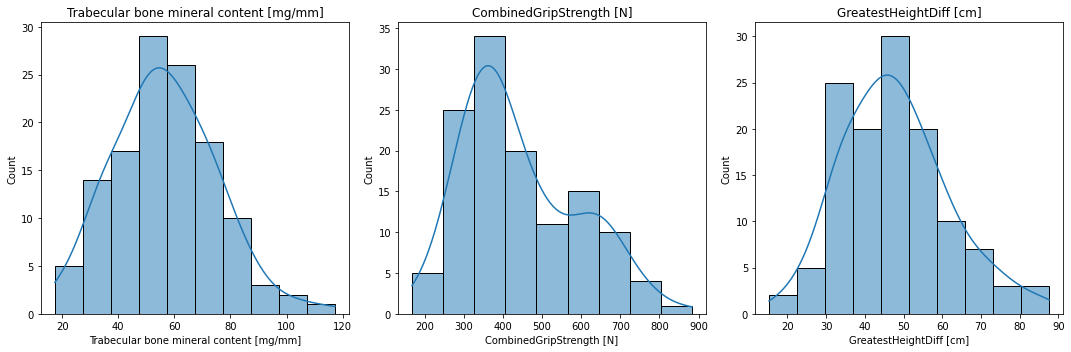

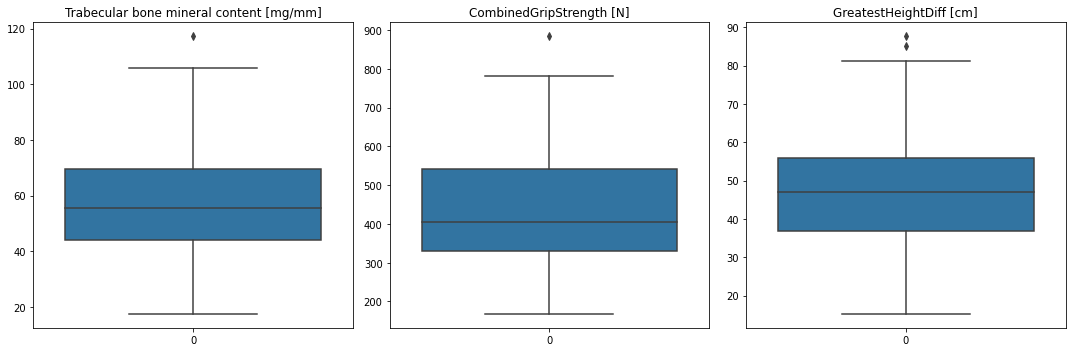

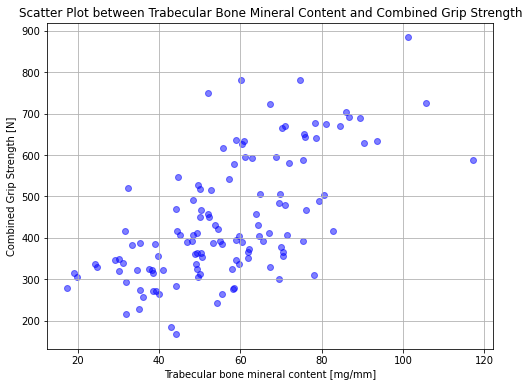

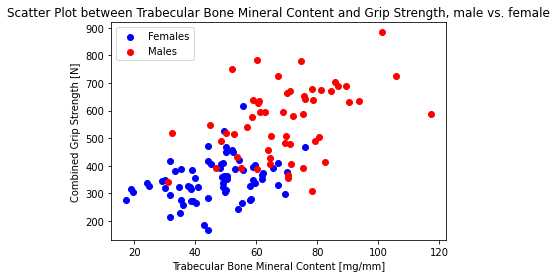

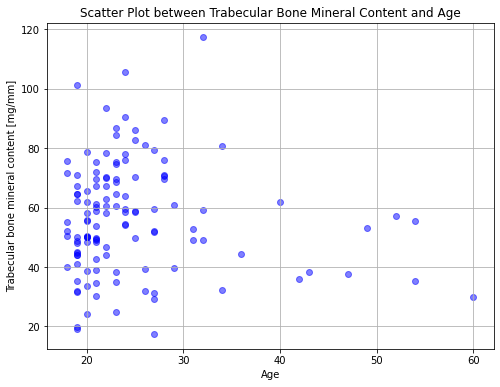

In [2]:

#Exercice C

#Question 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './dataC.txt'
data = pd.read_csv(file_path, sep='\t')

# Assuming you have a DataFrame 'data' with columns: 
#'Trabecular bone mineral content [mg/mm]', 'CombinedGripStrength [N]', 'GreatestHeightDiff [cm]'

# Check for normality using histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Trabecular bone mineral content [mg/mm]'], kde=True)
plt.title('Trabecular bone mineral content [mg/mm]')

plt.subplot(1, 3, 2)
sns.histplot(data['CombinedGripStrength [N]'], kde=True)
plt.title('CombinedGripStrength [N]')

plt.subplot(1, 3, 3)
sns.histplot(data['GreatestHeightDiff [cm]'], kde=True)
plt.title('GreatestHeightDiff [cm]')

plt.tight_layout()
plt.show()

from scipy.stats import shapiro

# Assuming you have a DataFrame 'data' with the specified columns

columns_to_test = ["Trabecular bone mineral content [mg/mm]", "CombinedGripStrength [N]", "GreatestHeightDiff [cm]"]

for column in columns_to_test:
    stat, p_value = shapiro(data[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    if p_value > 0.05:
        print("The data appears to be normally distributed (Fail to reject H0)")
    else:
        print("The data does not appear to be normally distributed (Reject H0)")
    
    print("\n")

# Check for outliers using box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data['Trabecular bone mineral content [mg/mm]'])
plt.title('Trabecular bone mineral content [mg/mm]')

plt.subplot(1, 3, 2)
sns.boxplot(data['CombinedGripStrength [N]'])
plt.title('CombinedGripStrength [N]')

plt.subplot(1, 3, 3)
sns.boxplot(data['GreatestHeightDiff [cm]'])
plt.title('GreatestHeightDiff [cm]')

plt.tight_layout()
plt.show()

#Ces graphiques mettent en évidence une corrélation entre Trabecular bone mineral content [mg/mm] et GreatestHeightDiff [cm]

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficients
corr_hand_grip = pearsonr(data['Trabecular bone mineral content [mg/mm]'], data['CombinedGripStrength [N]'])
corr_jump_height = pearsonr(data['Trabecular bone mineral content [mg/mm]'], data['GreatestHeightDiff [cm]'])

print(f"Pearson Correlation between Trabecular Bone Mineral Content and Hand Grip Strength: {corr_hand_grip[0]:.4f}, p-value: {corr_hand_grip[1]:.4f}")
print(f"Pearson Correlation between Trabecular Bone Mineral Content and Vertical Jump Height: {corr_jump_height[0]:.4f}, p-value: {corr_jump_height[1]:.4f}")

#The "Trabecular bone mineral content [mg/mm]" and "GreatestHeightDiff [cm]" groups follow a normal distribution, 
#but not the "CombinedGripStrength [N]" group.
#However, the Pearson correlation between "Trabecular bone mineral content [mg/mm]" and "CombinedGripStrength [N]" is 0.6417. 
#while that between "Trabecular bone mineral content [mg/mm]" and "GreatestHeightDiff [cm]" is 0.5708. 
#Pearson's correlation applies between two samples following a normal distribution (case for TBMC and GreatestHeightDiff). 
#In the case of TBMC and CombinedGripStrength, the Spearman correlation is more appropriate. 


# Calculate Spearman correlation coefficients (to compare correlation between a normal and an anormal distribution)
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame and you want to correlate 'Trabecular bone mineral content [mg/mm]' and 'CombinedGripStrength [N]'
# 'Trabecular bone mineral content [mg/mm]' follows a normal distribution, while 'CombinedGripStrength [N]' does not

# Calculate Spearman correlation coefficient and p-value
corr_coefficient, p_value = spearmanr(data['Trabecular bone mineral content [mg/mm]'], data['CombinedGripStrength [N]'])

print(f"Spearman Correlation Coefficient between Trabecular Bone Mineral Content and Hand Grip Strength: {corr_coefficient:.4f},P-value: {p_value:.4f}")


#With Spearman, the correlation coefficient is 0.6331, which is very close to 0.6417 but still lower.
#We conclude that CombinedGripStrength is the best predictor of bone quality

#Question 2

import matplotlib.pyplot as plt

# Scatter plot between Trabecular bone mineral content and the best predictor
plt.figure(figsize=(8, 6))
plt.scatter(data['Trabecular bone mineral content [mg/mm]'], data['CombinedGripStrength [N]'], alpha=0.5, color='blue')
plt.title('Scatter Plot between Trabecular Bone Mineral Content and Combined Grip Strength')
plt.xlabel('Trabecular bone mineral content [mg/mm]')
plt.ylabel('Combined Grip Strength [N]')
plt.grid(True)
plt.show()

#Question 3
import pandas as pd

# Separate datas in two groups : female (F) and mal (M)
women_data = data[data['Gender'] == 'F']
men_data = data[data['Gender'] == 'M']

# let's check the normality of the two groups divided by sexes 

# For women
# Shapiro-Wilk test for 'Trabecular bone mineral content [mg/mm]'
statistic, p_value = shapiro(women_data['Trabecular bone mineral content [mg/mm]'])
print(f"Shapiro-Wilk for Trabecular bone mineral content in women - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")

# Shapiro-Wilk test for 'CombinedGripStrength [N]'
statistic, p_value = shapiro(women_data['CombinedGripStrength [N]'])
print(f"Shapiro-Wilk for CombinedGripStrength in women - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")

# For men
# Shapiro-Wilk test for 'Trabecular bone mineral content [mg/mm]'
statistic, p_value = shapiro(men_data['Trabecular bone mineral content [mg/mm]'])
print(f"Shapiro-Wilk for Trabecular bone mineral content in men - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")

# Shapiro-Wilk test for 'CombinedGripStrength [N]'
statistic, p_value = shapiro(men_data['CombinedGripStrength [N]'])
print(f"Shapiro-Wilk for CombinedGripStrength in men - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")

#Every groups are normally distributed, we can calculate the Pearson correlation coefficients

# Calculate Pearson correlation coefficients
correlation_women = pearsonr(women_data['Trabecular bone mineral content [mg/mm]'], women_data['CombinedGripStrength [N]'])
correlation_men = pearsonr(men_data['Trabecular bone mineral content [mg/mm]'], men_data['CombinedGripStrength [N]'])

print(f"Pearson Correlation between Trabecular Bone Mineral Content and Hand Grip Strength for women: {correlation_women[0]:.4f}, p-value: {correlation_women[1]:.4f}")
print(f"Pearson Correlation between Trabecular Bone Mineral Content and Hand Grip Strength for men: {correlation_men[0]:.4f}, p-value: {correlation_men[1]:.4f}")

# Test correlation avec Vertical Jump Height
print("Test correlation avec Vertical Jump Height :")
#for women
# Shapiro-Wilk test for 'CombinedGripStrength [N]'
statistic, p_value = shapiro(women_data['GreatestHeightDiff [cm]'])
print(f"Shapiro-Wilk for GreatestHeightDiff in women - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")
# => normal distribution

#for men
# Shapiro-Wilk test for 'CombinedGripStrength [N]'
statistic, p_value = shapiro(men_data['GreatestHeightDiff [cm]'])
print(f"Shapiro-Wilk for GreatestHeightDiff in men - Statistic: {statistic:.4f}, p-value: {p_value:.4f}")
# => normal distribution

# Calculate Pearson correlation coefficients
correlation_women = pearsonr(women_data['Trabecular bone mineral content [mg/mm]'], women_data['GreatestHeightDiff [cm]'])
correlation_men = pearsonr(men_data['Trabecular bone mineral content [mg/mm]'], men_data['GreatestHeightDiff [cm]'])

print(f"Pearson Correlation between Trabecular Bone Mineral Content and GreatestHeightDiff for women: {correlation_women[0]:.4f}, p-value: {correlation_women[1]:.4f}")
print(f"Pearson Correlation between Trabecular Bone Mineral Content and GreatestHeightDiff for men: {correlation_men[0]:.4f}, p-value: {correlation_men[1]:.4f}")

#Question 4


# Scatter plot for females
plt.scatter(women_data['Trabecular bone mineral content [mg/mm]'], women_data['CombinedGripStrength [N]'], label='Females', color='blue')

# Scatter plot for males
plt.scatter(men_data['Trabecular bone mineral content [mg/mm]'], men_data['CombinedGripStrength [N]'], label='Males', color='red')

# Labels and title
plt.xlabel('Trabecular Bone Mineral Content [mg/mm]')
plt.ylabel('Combined Grip Strength [N]')
plt.title('Scatter Plot between Trabecular Bone Mineral Content and Grip Strength, male vs. female')

# Legend
plt.legend()

# Show plot
plt.show()

#Question 5

# Scatter plot between Trabecular bone mineral content and the age
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Trabecular bone mineral content [mg/mm]'], alpha=0.5, color='blue')
plt.title('Scatter Plot between Trabecular Bone Mineral Content and Age')
plt.xlabel('Age')
plt.ylabel('Trabecular bone mineral content [mg/mm]')
plt.grid(True)
plt.show()

#5) Bone mineral content should decrease with age, but it does not in this dataset. Looking at the
#scatter plot between age and mineral content, can you hypothesize why?

# Initialisation des compteurs
below_30 = 0
above_30 = 0

# Boucle pour parcourir les données et compter les personnes
for age in data['Age']:
    if age < 30:
        below_30 += 1
    else:
        above_30 += 1

# Affichage des résultats
print(f"Number of people below 30 years old : {below_30}")
print(f"Number of people above 30 years old : {above_30}")

#Answer, Because our sample is nothomogeneously distributed in terms of age, with 108 subjects under 30 and 17 over 30.
#Our sample is therefore unsatisfactory for assessing the Trabecular bone mineral content as a function of age.
